In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw


from rdkit import Chem
from rdkit.Chem import rdchem
import pandas as pd

# Set display options and suppress all warnings
pd.set_option('display.max_columns', None)

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole  # Jupyter上で分子構造表示可能にする


import re
from collections import Counter

In [20]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

from rdkit.Avalon.pyAvalonTools import GetAvalonFP
from rdkit.Chem import AllChem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

In [2]:
# 1. トリアリールアミンの例SMILESリスト
smiles_list = [
    #"N(c1ccccc1)(c2ccccc2)c3ccccc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(Cl)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(F)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(CN)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(OC)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(cc3)[N+](=O)[O-]",    # NO2
    "N(c1ccccc1)(c2ccccc2)c3ccc(cc3)C(F)(F)F",        # CF3
    "N(c1ccccc1)(c2ccccc2)c3ccc(cc3)OC(F)(F)F",       # OCF3
    "N(c1ccccc1)(c2ccccc2)c3ccc(C#N)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(CO)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(S)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(CC)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(CCl)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(CBr)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(CI)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(C=O)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(N)cc3",
    "N(c1ccccc1)(c2ccccc2)c3ccc(C)cc3",
    "N(c1ccccc1)(c2ccccc2)c3cccc4ccccc34",   # 1-naphthyl
    "N(c1ccccc1)(c2ccccc2)c3ccc4ccccc4c3",   # 2-naphthyl
    "C1=CC=C(C=C1)N(C2=CC=CC=C2)C3=CC4=C(C=C3)C5=CC=CC=C5N4", # czlbazole
]

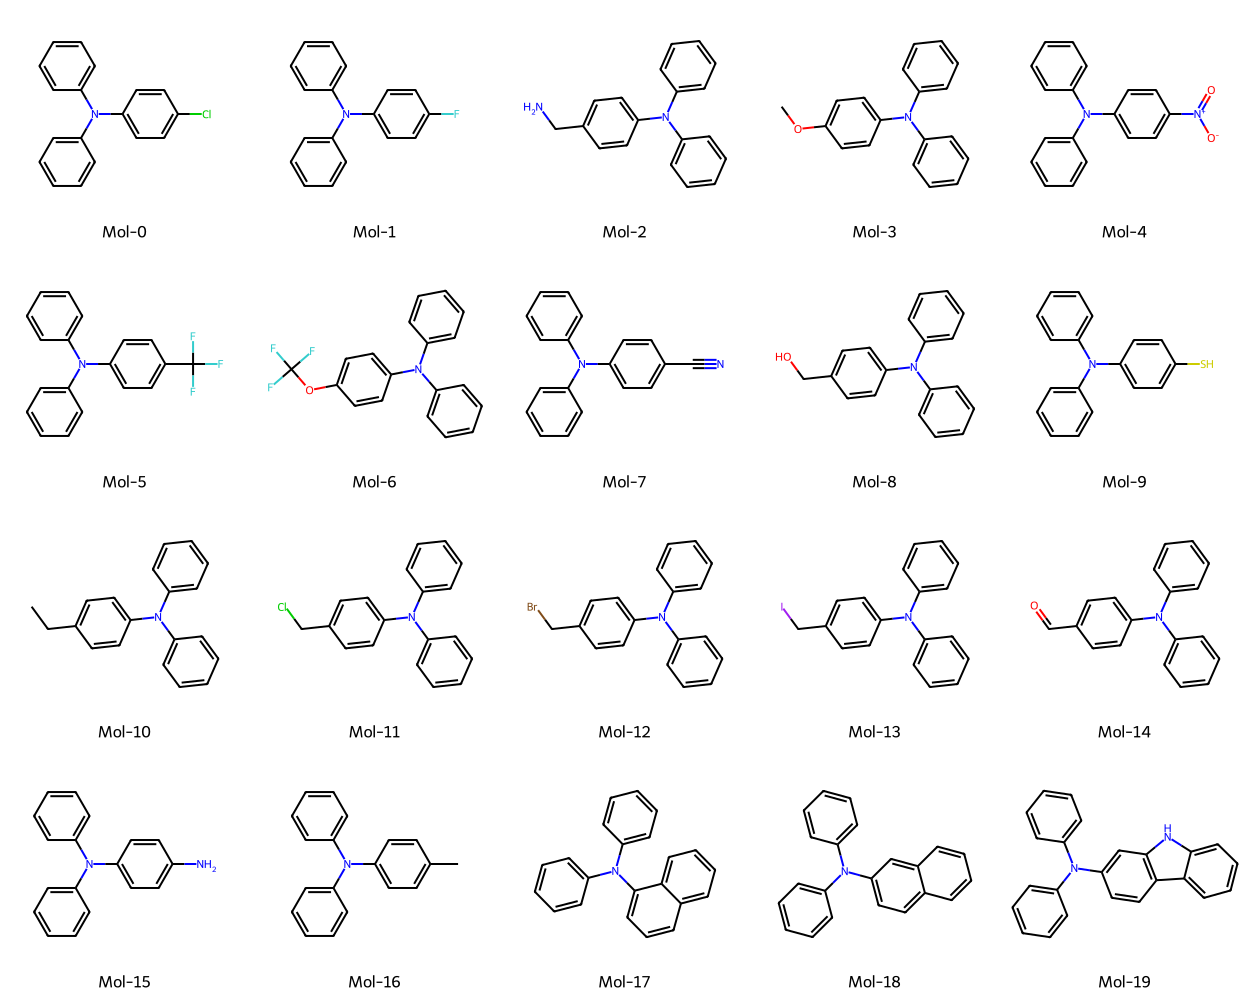

In [24]:
# 元分子
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
img_mols = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(250,250),
                                legends=[f"Mol-{i}" for i in range(len(mols))])
display(img_mols)

In [13]:
fp_train = []

for index, smiles_i in enumerate(smiles_list):
    #print(index + 1, '/', len(smiles))
    molecule = Chem.MolFromSmiles(smiles_i)

    morgan_gen = GetMorganGenerator(radius=3, fpSize=512)
    morgan_fps = morgan_gen.GetFingerprint(molecule)
    fp_train.append(morgan_fps)

fp_train = pd.DataFrame(np.array(fp_train, int))

# カラム名を変更
fp_names = []
for i in range(512):
    fp_names.append(f"MFP_{i}")

fp_train.columns = fp_names
fp_train.head()

,MFP_0,MFP_1,MFP_2,MFP_3,MFP_4,MFP_5,MFP_6,MFP_7,MFP_8,MFP_9,MFP_10,MFP_11,MFP_12,MFP_13,MFP_14,MFP_15,MFP_16,MFP_17,MFP_18,MFP_19,MFP_20,MFP_21,MFP_22,MFP_23,MFP_24,MFP_25,MFP_26,MFP_27,MFP_28,MFP_29,MFP_30,MFP_31,MFP_32,MFP_33,MFP_34,MFP_35,MFP_36,MFP_37,MFP_38,MFP_39,MFP_40,MFP_41,MFP_42,MFP_43,MFP_44,MFP_45,MFP_46,MFP_47,MFP_48,MFP_49,MFP_50,MFP_51,MFP_52,MFP_53,MFP_54,MFP_55,MFP_56,MFP_57,MFP_58,MFP_59,MFP_60,MFP_61,MFP_62,MFP_63,MFP_64,MFP_65,MFP_66,MFP_67,MFP_68,MFP_69,MFP_70,MFP_71,MFP_72,MFP_73,MFP_74,MFP_75,MFP_76,MFP_77,MFP_78,MFP_79,MFP_80,MFP_81,MFP_82,MFP_83,MFP_84,MFP_85,MFP_86,MFP_87,MFP_88,MFP_89,MFP_90,MFP_91,MFP_92,MFP_93,MFP_94,MFP_95,MFP_96,MFP_97,MFP_98,MFP_99,MFP_100,MFP_101,MFP_102,MFP_103,MFP_104,MFP_105,MFP_106,MFP_107,MFP_108,MFP_109,MFP_110,MFP_111,MFP_112,MFP_113,MFP_114,MFP_115,MFP_116,MFP_117,MFP_118,MFP_119,MFP_120,MFP_121,MFP_122,MFP_123,MFP_124,MFP_125,MFP_126,MFP_127,MFP_128,MFP_129,MFP_130,MFP_131,MFP_132,MFP_133,MFP_134,MFP_135,MFP_136,MFP_137,MFP_138,MFP_139,MFP_140,MFP_141,MFP_142,MFP_143,MFP_144,MFP_145,MFP_146,MFP_147,MFP_148,MFP_149,MFP_150,MFP_151,MFP_152,MFP_153,MFP_154,MFP_155,MFP_156,MFP_157,MFP_158,MFP_159,MFP_160,MFP_161,MFP_162,MFP_163,MFP_164,MFP_165,MFP_166,MFP_167,MFP_168,MFP_169,MFP_170,MFP_171,MFP_172,MFP_173,MFP_174,MFP_175,MFP_176,MFP_177,MFP_178,MFP_179,MFP_180,MFP_181,MFP_182,MFP_183,MFP_184,MFP_185,MFP_186,MFP_187,MFP_188,MFP_189,MFP_190,MFP_191,MFP_192,MFP_193,MFP_194,MFP_195,MFP_196,MFP_197,MFP_198,MFP_199,MFP_200,MFP_201,MFP_202,MFP_203,MFP_204,MFP_205,MFP_206,MFP_207,MFP_208,MFP_209,MFP_210,MFP_211,MFP_212,MFP_213,MFP_214,MFP_215,MFP_216,MFP_217,MFP_218,MFP_219,MFP_220,MFP_221,MFP_222,MFP_223,MFP_224,MFP_225,MFP_226,MFP_227,MFP_228,MFP_229,MFP_230,MFP_231,MFP_232,MFP_233,MFP_234,MFP_235,MFP_236,MFP_237,MFP_238,MFP_239,MFP_240,MFP_241,MFP_242,MFP_243,MFP_244,MFP_245,MFP_246,MFP_247,MFP_248,MFP_249,MFP_250,MFP_251,MFP_252,MFP_253,MFP_254,MFP_255,MFP_256,MFP_257,MFP_258,MFP_259,MFP_260,MFP_261,MFP_262,MFP_263,MFP_264,MFP_265,MFP_266,MFP_267,MFP_268,MFP_269,MFP_270,MFP_271,MFP_272,MFP_273,MFP_274,MFP_275,MFP_276,MFP_277,MFP_278,MFP_279,MFP_280,MFP_281,MFP_282,MFP_283,MFP_284,MFP_285,MFP_286,MFP_287,MFP_288,MFP_289,MFP_290,MFP_291,MFP_292,MFP_293,MFP_294,MFP_295,MFP_296,MFP_297,MFP_298,MFP_299,MFP_300,MFP_301,MFP_302,MFP_303,MFP_304,MFP_305,MFP_306,MFP_307,MFP_308,MFP_309,MFP_310,MFP_311,MFP_312,MFP_313,MFP_314,MFP_315,MFP_316,MFP_317,MFP_318,MFP_319,MFP_320,MFP_321,MFP_322,MFP_323,MFP_324,MFP_325,MFP_326,MFP_327,MFP_328,MFP_329,MFP_330,MFP_331,MFP_332,MFP_333,MFP_334,MFP_335,MFP_336,MFP_337,MFP_338,MFP_339,MFP_340,MFP_341,MFP_342,MFP_343,MFP_344,MFP_345,MFP_346,MFP_347,MFP_348,MFP_349,MFP_350,MFP_351,MFP_352,MFP_353,MFP_354,MFP_355,MFP_356,MFP_357,MFP_358,MFP_359,MFP_360,MFP_361,MFP_362,MFP_363,MFP_364,MFP_365,MFP_366,MFP_367,MFP_368,MFP_369,MFP_370,MFP_371,MFP_372,MFP_373,MFP_374,MFP_375,MFP_376,MFP_377,MFP_378,MFP_379,MFP_380,MFP_381,MFP_382,MFP_383,MFP_384,MFP_385,MFP_386,MFP_387,MFP_388,MFP_389,MFP_390,MFP_391,MFP_392,MFP_393,MFP_394,MFP_395,MFP_396,MFP_397,MFP_398,MFP_399,MFP_400,MFP_401,MFP_402,MFP_403,MFP_404,MFP_405,MFP_406,MFP_407,MFP_408,MFP_409,MFP_410,MFP_411,MFP_412,MFP_413,MFP_414,MFP_415,MFP_416,MFP_417,MFP_418,MFP_419,MFP_420,MFP_421,MFP_422,MFP_423,MFP_424,MFP_425,MFP_426,MFP_427,MFP_428,MFP_429,MFP_430,MFP_431,MFP_432,MFP_433,MFP_434,MFP_435,MFP_436,MFP_437,MFP_438,MFP_439,MFP_440,MFP_441,MFP_442,MFP_443,MFP_444,MFP_445,MFP_446,MFP_447,MFP_448,MFP_449,MFP_450,MFP_451,MFP_452,MFP_453,MFP_454,MFP_455,MFP_456,MFP_457,MFP_458,MFP_459,MFP_460,MFP_461,MFP_462,MFP_463,MFP_464,MFP_465,MFP_466,MFP_467,MFP_468,MFP_469,MFP_470,MFP_471,MFP_472,MFP_473,MFP_474,MFP_475,MFP_476,MFP_477,MFP_478,MFP_479,MFP_480,MFP_481,MFP_482,MFP_483,MFP_484,MFP_485,MFP_486,MFP_487,MFP_488,MFP_489,MFP_490,MFP_491,MFP_492,MFP_493,MFP_494,MFP_495,MFP_496,MFP_497,MFP_498,MFP_499,MFP_500,MFP_501,MFP_502,MFP_503,MFP_504,MFP_505,MFP_506,MFP_507,MFP_508,MFP_509,MFP_510,MFP_511
0,0,0,0,0,0,0

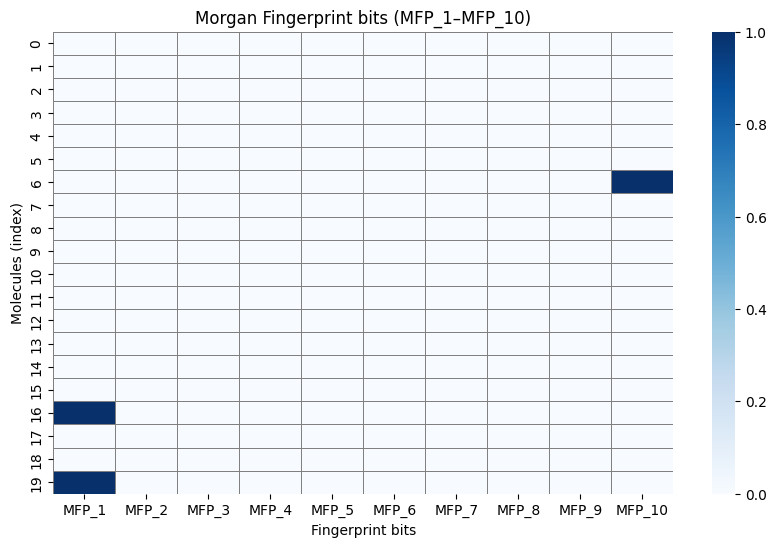

In [14]:
# 可視化する列と行を選択
subset_cols = [f"MFP_{i}" for i in range(1, 11)]  # MFP_1～MFP_10
subset_rows = fp_train.head(20)  # 最初の20分子を例に

# 図のサイズを設定
plt.figure(figsize=(10, 6))

# ヒートマップの描画（0/1を色で表現）
sns.heatmap(subset_rows[subset_cols],
            cmap="Blues",         # 色マップ（0=白, 1=青系）
            cbar=True,            # カラーバー表示
            linewidths=0.5,       # セルの境界線
            linecolor='gray')

plt.title("Morgan Fingerprint bits (MFP_1–MFP_10)")
plt.xlabel("Fingerprint bits")
plt.ylabel("Molecules (index)")
plt.show()

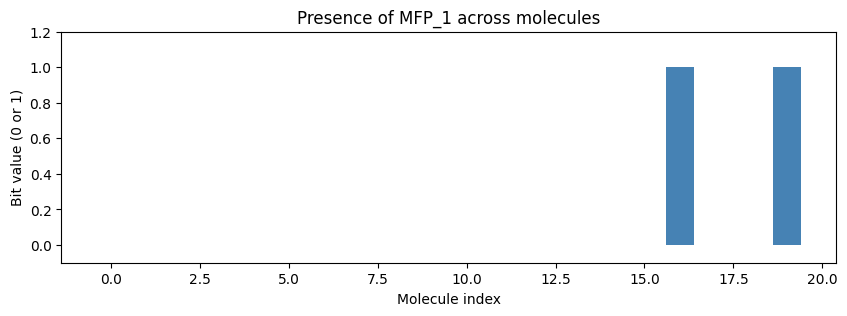

In [17]:
# 対象ビットを指定
target_bit = "MFP_1"

# 対象ビットの値を取得（0 or 1）
bit_values = fp_train[target_bit].values

# 図の設定
plt.figure(figsize=(10, 3))

# 縦棒グラフを描画（1の部分だけ棒を立てる）
plt.bar(range(len(bit_values)), bit_values, color='steelblue')

plt.title(f"Presence of {target_bit} across molecules")
plt.xlabel("Molecule index")
plt.ylabel("Bit value (0 or 1)")
plt.ylim(-0.1, 1.2)
plt.show()

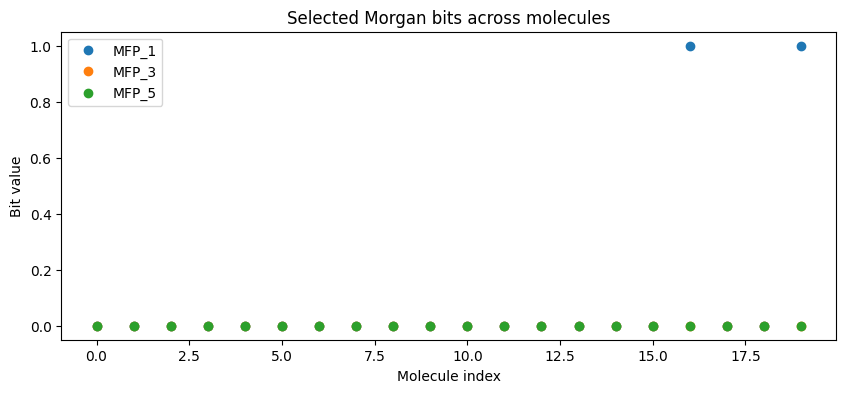

In [18]:
target_bits = ["MFP_1", "MFP_3", "MFP_5"]

plt.figure(figsize=(10, 4))
for bit in target_bits:
    plt.plot(fp_train[bit].values, label=bit, marker='o', linestyle='')

plt.title("Selected Morgan bits across molecules")
plt.xlabel("Molecule index")
plt.ylabel("Bit value")
plt.legend()
plt.show()


✅ Bit 448 は分子中に存在します


[05:25:17] DEPRECATION WARNING: please use MorganGenerator


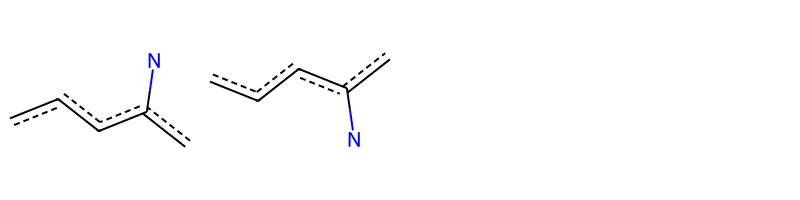

In [21]:
# --- 設定 ---
target_bit_id = 448   # 可視化したいビット番号
radius = 3            # Morganの半径（fp生成時と合わせる）

# 対象とする分子（例として最初の分子を使用）
smiles_i = smiles_list[0]
mol = Chem.MolFromSmiles(smiles_i)

# --- bitInfo付きでフィンガープリント生成 ---
bitInfo = {}
fp = GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=512, bitInfo=bitInfo)

# --- ビットが存在するか確認 ---
if target_bit_id in bitInfo:
    print(f"✅ Bit {target_bit_id} は分子中に存在します")
    sub_imgs = []
    for atom_idx, rad in bitInfo[target_bit_id]:
        # 部分構造（中心原子と半径に基づく）
        env = Chem.FindAtomEnvironmentOfRadiusN(mol, rad, atom_idx)
        submol = Chem.PathToSubmol(mol, env)
        sub_imgs.append(submol)

    # --- サブ構造を描画 ---
    img = Draw.MolsToGridImage(sub_imgs, molsPerRow=4, subImgSize=(200, 200))
    display(img)
else:
    print(f"❌ Bit {target_bit_id} はこの分子中には存在しません。")


✅ MFP_90 が立っている分子: [1, 19]


[05:42:08] DEPRECATION WARNING: please use MorganGenerator
[05:42:08] DEPRECATION WARNING: please use MorganGenerator


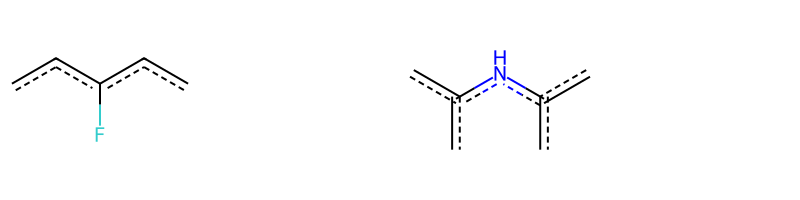

In [ ]:
# --- 設定 ---
target_bit_id = 90   # 可視化したいビット番号
radius = 3            # fp生成時と同じ値
fp_col = f"MFP_{target_bit_id}"

# --- MFP_448 が 1 の分子インデックスを抽出 ---
active_indices = fp_train.index[fp_train[fp_col] == 1].tolist()
print(f"✅ MFP_{target_bit_id} が立っている分子: {active_indices}")

# --- 可視化結果を格納するリスト ---
mol_images = []

# --- 対象分子ごとに部分構造を取得 ---
for idx in active_indices:
    smiles_i = smiles_list[idx]
    mol = Chem.MolFromSmiles(smiles_i)
    bitInfo = {}

    fp = GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=512, bitInfo=bitInfo)

    # ターゲットビットが分子中に存在する場合
    if target_bit_id in bitInfo:
        for atom_idx, rad in bitInfo[target_bit_id]:
            env = Chem.FindAtomEnvironmentOfRadiusN(mol, rad, atom_idx)
            submol = Chem.PathToSubmol(mol, env)
            mol_images.append(submol)

# --- 全サブ構造をまとめて可視化 ---
if mol_images:
    img = Draw.MolsToGridImage(mol_images, molsPerRow=4, subImgSize=(200, 200))
    display(img)
else:
    print(f"❌ MFP_{target_bit_id} に対応する部分構造は見つかりませんでした。")


[05:36:39] DEPRECATION WARNING: please use MorganGenerator


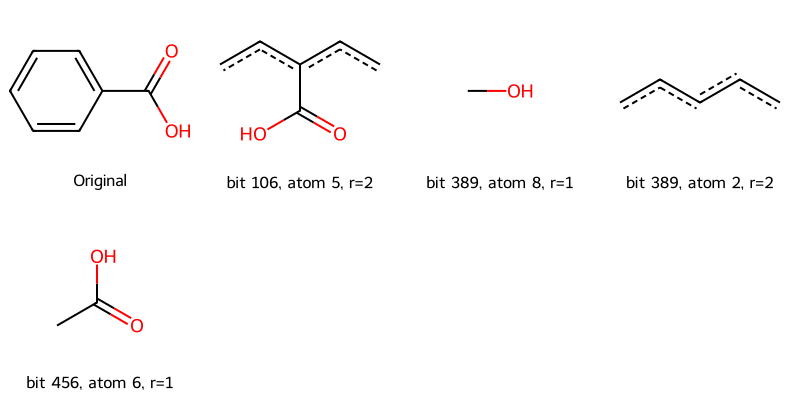

In [33]:
# 分子を定義（例：安息香酸）
mol = Chem.MolFromSmiles("c1ccccc1C(=O)O")

# bitInfoを取得
bitInfo = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bitInfo)

# 可視化するビット番号を選ぶ（例として最初の3つ）
target_bits = list(bitInfo.keys())[:3]

# 各ビットに対応する部分構造を描画
imgs = []
for bit in target_bits:
    for atom_idx, rad in bitInfo[bit]:
        submol = AllChem.PathToSubmol(mol, AllChem.FindAtomEnvironmentOfRadiusN(mol, rad, atom_idx))
        legend = f"bit {bit}, center atom {atom_idx}, radius {rad}"
        imgs.append(Draw.MolToImage(submol, size=(200, 200), legend=legend))

# グリッド表示
from PIL import Image
Draw.MolsToGridImage([Chem.MolFromSmiles("c1ccccc1C(=O)O")]+[Chem.MolFromSmiles("C")],
                     legends=["元の分子",""])  # 例: 元分子も表示
Draw.MolsToGridImage([Chem.MolFromSmiles("C")])
Draw.MolsToGridImage([Chem.MolFromSmiles("C")])
Draw.MolsToGridImage([Chem.MolFromSmiles("C")])
Draw.MolsToGridImage([Chem.MolFromSmiles("C")])

# 実際は以下でまとめて表示
Draw.MolsToGridImage([Chem.MolFromSmiles("c1ccccc1C(=O)O")]+
                     [AllChem.PathToSubmol(mol, AllChem.FindAtomEnvironmentOfRadiusN(mol, rad, atom_idx))
                      for bit in target_bits for atom_idx, rad in bitInfo[bit]],
                     legends=["Original"] + [f"bit {bit}, atom {atom_idx}, r={rad}" 
                                              for bit in target_bits for atom_idx, rad in bitInfo[bit]],
                     molsPerRow=4, subImgSize=(200,200))